# Mushroom classification project.

The main task of this project is the implementation from scratch of tree predictors for binary classification to determine whether mushrooms are poisonous. 

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [53]:
data = pd.read_csv('data/secondary_data.csv', delimiter=';')

num_data_points = data.shape[0]
print(f'The number of data points in the DataFrame: {num_data_points}')

#data.head()

The number of data points in the DataFrame: 61069


# Data exploration

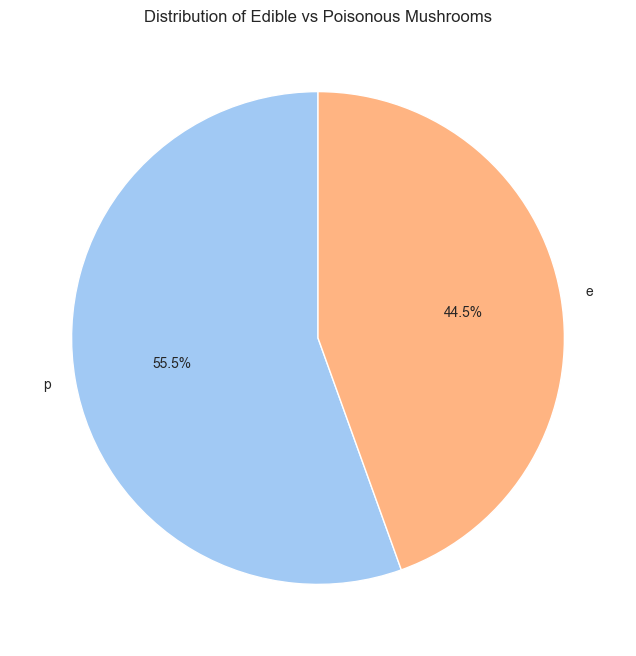

In [54]:
# Distribution of the target column 'class' in the dataset
target_column = 'class'
target_counts = data[target_column].value_counts()
labels = target_counts.index

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.show()

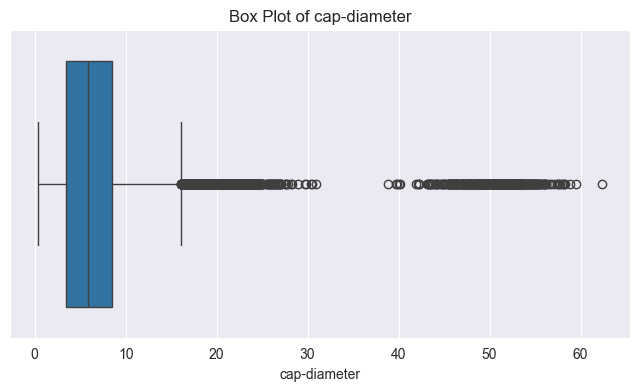

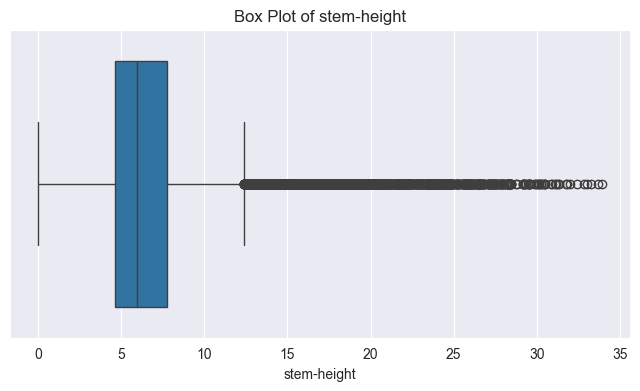

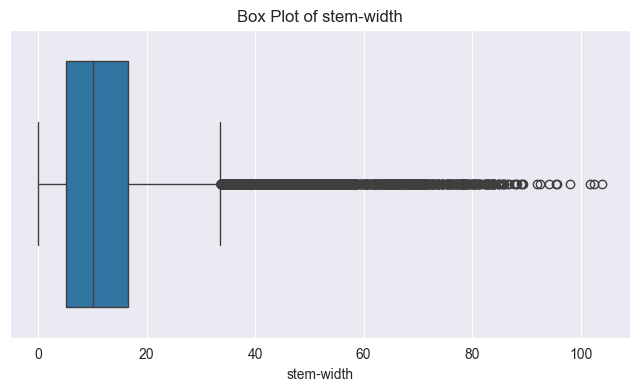

In [55]:
# Distribution for numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


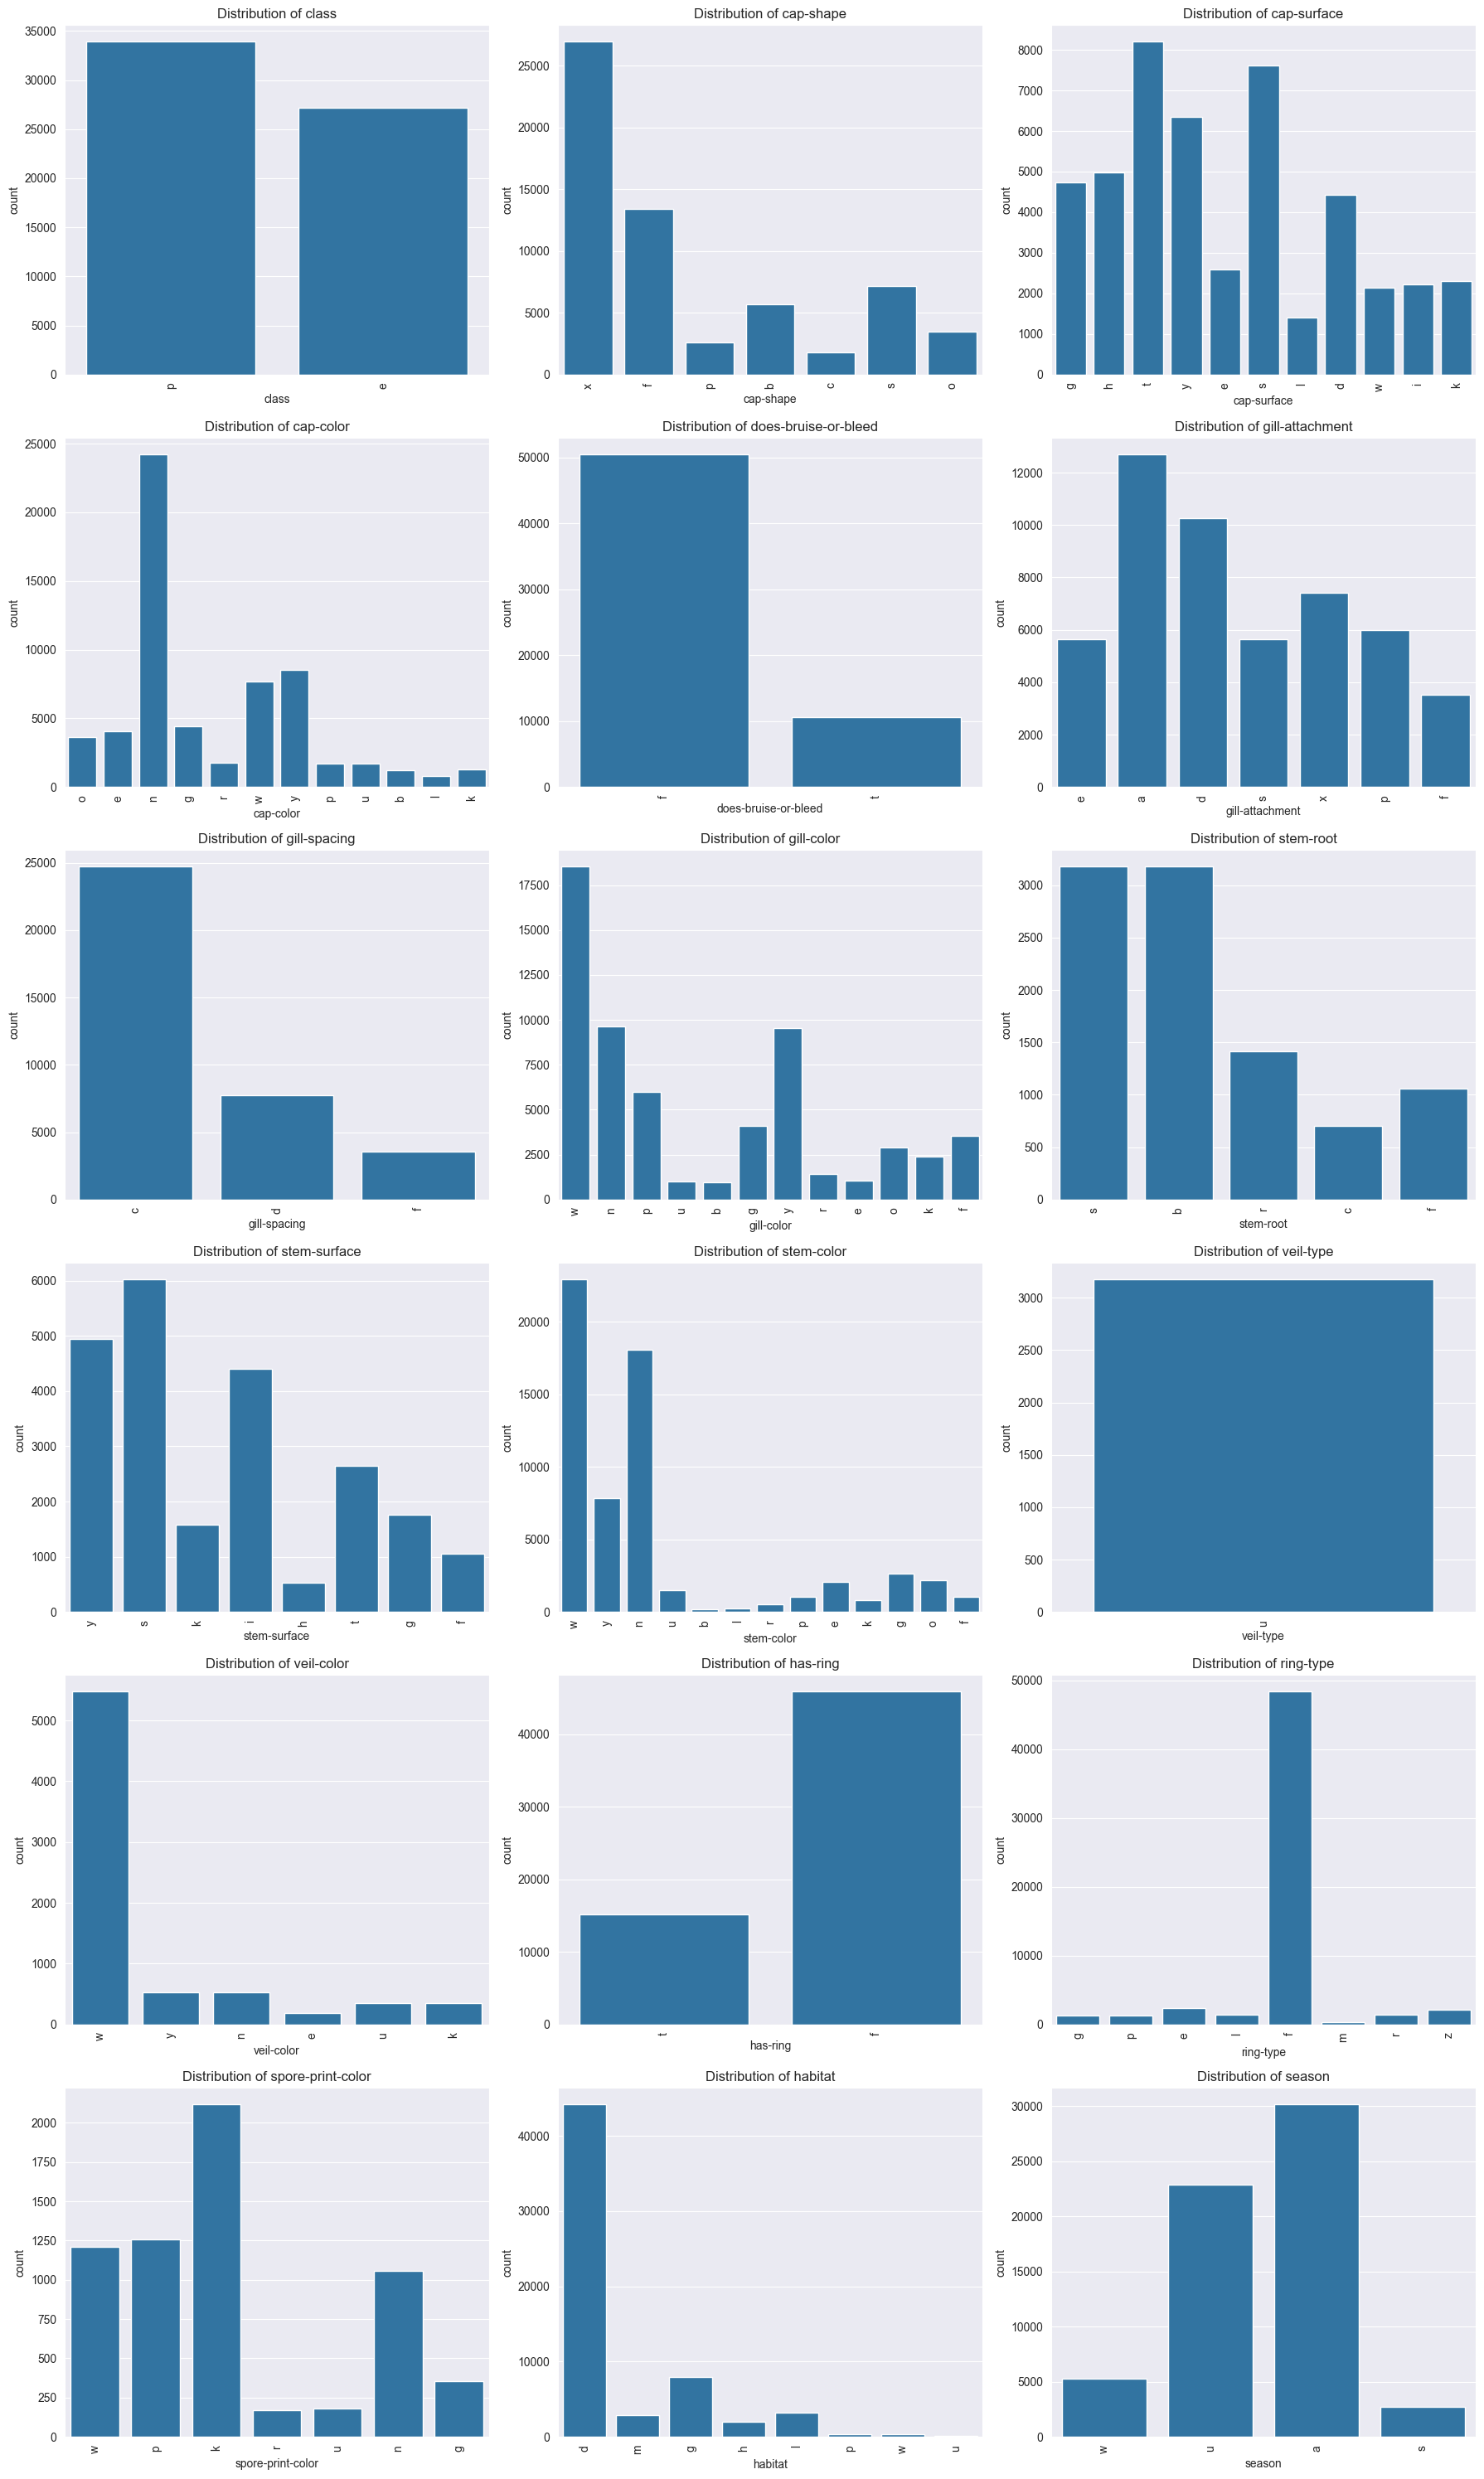

In [56]:
# Distribution for categorical columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

# Determine the number of rows and columns for subplots based on the number of categorical features
n_cols = 3  
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

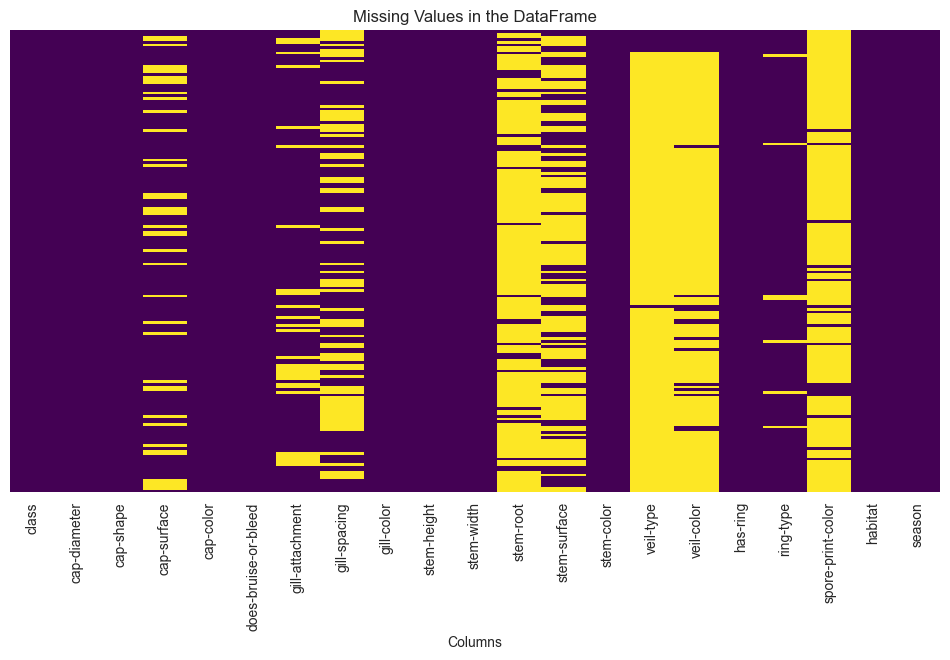

In [57]:
# Plot null values on each column
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.xlabel("Columns")
plt.title("Missing Values in the DataFrame")
plt.show()


# Data cleaning

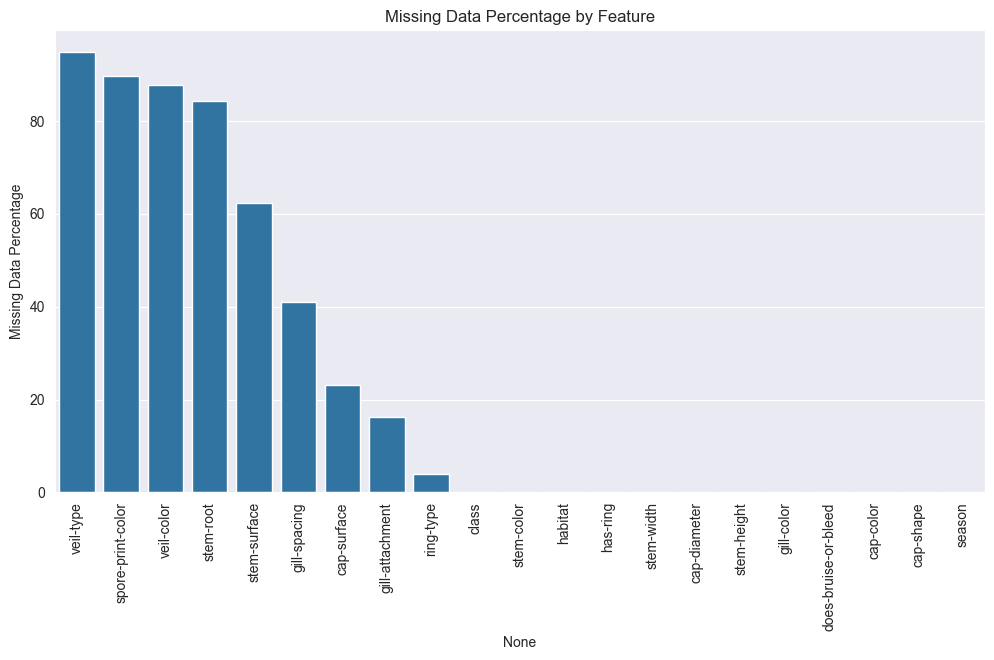

In [58]:
missing_data_percentage = (data.isnull().sum() / data.shape[0]) * 100
missing_data_percentage = missing_data_percentage.sort_values(ascending=False)
#print(missing_data_percentage)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data_percentage.index, y=missing_data_percentage)
plt.xticks(rotation=90)
plt.ylabel('Missing Data Percentage')
plt.title('Missing Data Percentage by Feature')
plt.show()

In [59]:
# Dropping columns with too many missing values (more than 80%)
columns_to_drop = ['veil-type', 'spore-print-color', 'veil-color', 'stem-root', 'stem-surface']
data_cleaned = data.drop(columns=columns_to_drop)
#print(data_cleaned.head())

# Data imputation

In [60]:
# Filling missing values with the most frequent value in the remaining columns
columns_to_fill = ['gill-spacing', 'cap-surface', 'gill-attachment', 'ring-type']
for column in columns_to_fill:
    most_frequent_value = data_cleaned[column].mode()[0]  # Finding the most frequent value
    data_cleaned[column].fillna(most_frequent_value, inplace=True)

#print(data_cleaned.isnull().sum())  # Verifying that missing data has been filled

# Data Encoding

In [61]:
# Select columns that are not numeric
non_numeric_columns = data_cleaned.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')


In [62]:
print(data_cleaned.info())
print(data_cleaned.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  has-ring              61069 non-null  object 
 13  ring-type             61069 non-null  object 
 14  habitat               61069 non-null  object 
 15  season             

In [63]:
# Encoding
one_hot_columns = ['cap-shape', 'gill-attachment', 'cap-surface', 'cap-color', 'gill-color', 'stem-color', 'ring-type', 'habitat']
data_encoded = pd.get_dummies(data_cleaned, columns=one_hot_columns)
# Convert boolean (True/False) columns to numeric (1/0)
data_encoded = data_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))

label_columns = ['does-bruise-or-bleed', 'gill-spacing', 'class', 'has-ring', 'season']
le = LabelEncoder()
for column in label_columns:
    data_encoded[column] = le.fit_transform(data_encoded[column])
#print(data_encoded.head())

In [64]:
# Check there is no non-numeric columns
print(data_encoded.select_dtypes(exclude=['number']).columns)

Index([], dtype='object')
